In [364]:
#Connect Google Drive to Colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Drive REST API and authenticate

from google.colab import auth
auth.authenticate_user()

In [366]:
#List Files and Directories

!ls -a
!ls "/content/drive/My Drive" -a

Encoder        model.h5   test	    train      validation
model_best.h5  model.png  test.csv  train.csv  valid.csv
 3761-16440-1-PB.pdf  'Getting started.pdf'
'Colab Notebooks'      vgg16_weights_kernels.h5


In [ ]:
#Change dir
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')

In [ ]:
#unzip data in Folder
!unzip -q data1.zip -d data1/

In [5]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
tf.__version__

TensorFlow 2.x selected.


'2.1.0'

In [ ]:
# Import Usable Library
import os
import cv2
import keras
import random
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
import tensorflow as tp
from tensorflow import keras
from keras.models import Model
from keras import backend as K
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Input, Dense
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import LSTM, Dense, Activation, Embedding
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten


In [369]:
# Import Necessary Library

import warnings
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
from keras import Sequential
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from keras.optimizers import Adam
from keras.layers import Activation
from keras.preprocessing import image
warnings.filterwarnings(action='ignore')
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD , RMSprop
from keras import layers, models, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from keras.losses import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Conv2D,MaxPool2D,Dropout,Dense,Flatten,BatchNormalization
from keras.callbacks import ModelCheckpoint,Callback,EarlyStopping
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Input,Flatten,SeparableConv2D
tf.__version__

'2.1.0'

In [370]:
os.chdir('/content/drive/My Drive/Colab Notebooks/data1')
!ls

Encoder        model.h5   test	    train      validation
model_best.h5  model.png  test.csv  train.csv  valid.csv


In [ ]:
colnames=["filename", "label"]
train = pd.read_csv('train.csv', names=colnames,header=None)
valid = pd.read_csv('valid.csv', names=colnames,header=None)
test  = pd.read_csv('test.csv', names=colnames,header=None)

In [372]:
train.head()

,filename,label
0,swift-0.jpg,0
1,swift-1.jpg,0
2,swift-10.jpg,0
3,swift-100.jpg,0
4,swift-1000.jpg,0


In [422]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('train/'+train['filename'][i], target_size=(28,28,1))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X_train = np.array(train_image)


valid_image = []
for i in tqdm(range(valid.shape[0])):
    img = image.load_img('validation/'+valid['filename'][i], target_size=(28,28,1))
    img = image.img_to_array(img)
    img = img/255
    valid_image.append(img)
X_valid = np.array(valid_image)


test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img('test/'+test['filename'][i], target_size=(28,28,1))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
X_test = np.array(test_image)

100%|██████████| 800/800 [00:02<00:00, 277.51it/s]


In [423]:
Y_train = train['label']
Y_valid = valid['label']
Y_test  = test['label']
print( "X_train shape is:   " , X_train.shape,"Y_train shape is:  " , Y_train.shape,"\n"
      ,"X_valid shape is:   " , X_valid.shape,"Y_valid shape is:  " , Y_valid.shape,"\n" 
      ,"X_test shape is:    " , X_test.shape, "Y_test shape is:   " , Y_test.shape
       )

X_train shape is:    (2400, 28, 28, 3) Y_train shape is:   (2400,) 
 X_valid shape is:    (800, 28, 28, 3) Y_valid shape is:   (800,) 
 X_test shape is:     (800, 28, 28, 3) Y_test shape is:    (800,)


In [ ]:
#Functional Model

input = keras.layers.Input(shape=(28,28,3))
F1 = keras.layers.Flatten()(input)
D1 = keras.layers.Dense(60, activation="relu")(F1)
B1 = keras.layers.BatchNormalization()(D1)
D1 = keras.layers.Dropout(0.20)(B1)
C1 = keras.layers.concatenate([F1, D1])
D2 = keras.layers.Dropout(0.20)(C1)
output = keras.layers.Dense(1)(C1)
model = keras.models.Model(inputs=[input], outputs=[output])

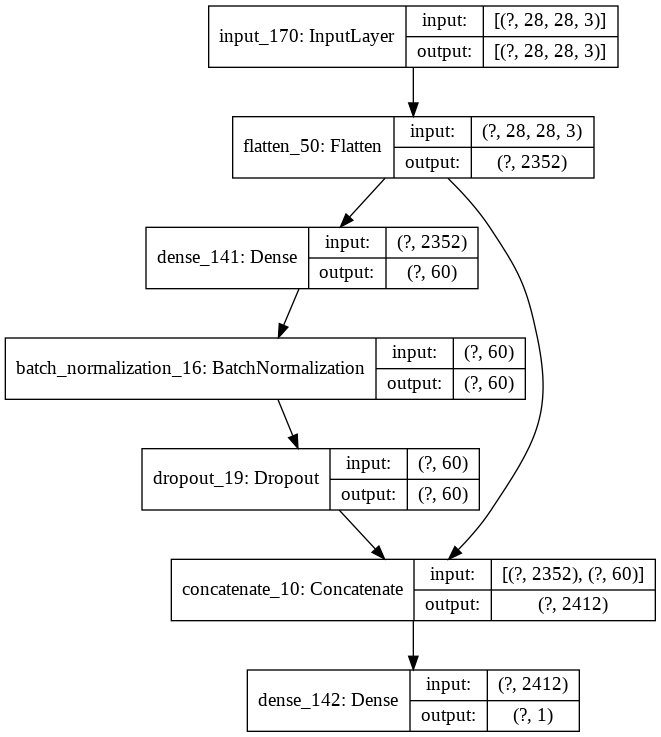

In [425]:
keras.utils.plot_model(model,  show_shapes=True)

In [426]:
model.summary()

Model: "model_70"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_170 (InputLayer)          [(None, 28, 28, 3)]  0                                            
__________________________________________________________________________________________________
flatten_50 (Flatten)            (None, 2352)         0           input_170[0][0]                  
__________________________________________________________________________________________________
dense_141 (Dense)               (None, 60)           141180      flatten_50[0][0]                 
__________________________________________________________________________________________________
batch_normalization_16 (BatchNo (None, 60)           240         dense_141[0][0]                  
___________________________________________________________________________________________

In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3),metrics=["accuracy"])

In [428]:
early_stopping = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
model.fit(X_train, Y_train, epochs=100,
                    validation_data=(X_valid,Y_valid),
                    callbacks=[ early_stopping])

Train on 2400 samples, validate on 800 samples
Epoch 1/100
2400/2400 [==============================] - 1s 364us/sample - loss: 0.3869 - accuracy: 0.5000 - val_loss: 0.3279 - val_accuracy: 0.5250
Epoch 2/100
2400/2400 [==============================] - 0s 158us/sample - loss: 0.3360 - accuracy: 0.5158 - val_loss: 0.3251 - val_accuracy: 0.5375
Epoch 3/100
2400/2400 [==============================] - 0s 147us/sample - loss: 0.3110 - accuracy: 0.5263 - val_loss: 0.3074 - val_accuracy: 0.5375
Epoch 4/100
2400/2400 [==============================] - 0s 166us/sample - loss: 0.3009 - accuracy: 0.5458 - val_loss: 0.3101 - val_accuracy: 0.5450
Epoch 5/100
2400/2400 [==============================] - 0s 141us/sample - loss: 0.2828 - accuracy: 0.5633 - val_loss: 0.2871 - val_accuracy: 0.5550
Epoch 6/100
2400/2400 [==============================] - 0s 153us/sample - loss: 0.2743 - accuracy: 0.5783 - val_loss: 0.2839 - val_accuracy: 0.5725
Epoch 7/100
2400/2400 [==============================] - 0s

In [ ]:
# This returns a tensor
inputs = keras.Input(shape=(2400, 28, 28, 3))

# a layer instance is callable on a tensor, and returns a tensor
output_1 = keras.layers.Dense(64, activation='relu')(inputs)
output_2 = keras.layers.Dense(64, activation='relu')(output_1)
predictions = keras.layers.Dense(10, activation='softmax')(output_2)

# This creates a model that includes
# the Input layer and three Dense layers
model = keras.models.Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stopping = [EarlyStopping(monitor='val_loss', patience=3 ), 
            ModelCheckpoint(filepath='end.h5', monitor='val_loss' , save_best_only=True)]
history = model.fit(X_train, Y_train,
                    steps_per_epoch= 120,  #number train_images/batch size(2400/20)
                    epochs=10,
                    validation_data=(X_valid,Y_valid),
                    validation_steps=40, #number valid_images/batch_size(800/20)
                    shuffle=True,
                    callbacks = early_stopping)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
model.fit(X_train, Y_train, epochs=100,
                    validation_data=(X_valid,Y_valid),
                    callbacks=[checkpoint, early_stopping])

In [ ]:
# Functional API
inputs = keras.Input(shape=(28, 28, 3))
T1 = keras.layers.Conv2D(32, (1, 1), activation='relu')(inputs)
T2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(T1)
T3 = keras.layers.Flatten()(T2)
T4 = keras.layers.Dense(1, activation='softmax')(T3)
T5 = keras.layers.BatchNormalization()(T4)
T6 = keras.layers.Dropout(0.20)(T5)
outputs = keras.layers.Dense(1, activation='softmax')(T6)
model = keras.models.Model(inputs=[inputs], outputs=[outputs])

In [466]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "model_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_184 (InputLayer)       [(None, 28, 28, 3)]       0         
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_99 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_64 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_162 (Dense)            (None, 1)                 6273      
_________________________________________________________________
batch_normalization_23 (Batc (None, 1)                 4         
_________________________________________________________________
dropout_29 (Dropout)         (None, 1)                 0  

In [ ]:
callback_list = [#save best model                    
                 ModelCheckpoint(filepath= 'model.h5', monitor= 'val_acc', save_best_only= True),]

history = model.fit(X_train,Y_train,
                    steps_per_epoch = 120,  # = num_train_images/batch size(2400/20)
                    epochs = 10,
                    validation_data = (X_valid,Y_valid),
                    callbacks = callback_list,
                    validation_steps = 40  # = num_valid_images/batch_size
                    )

Epoch 1/10
120/120 [==============================] - 21s 175ms/step - loss: 0.6736 - acc: 0.6992 - val_loss: 0.6211 - val_acc: 0.6637
Epoch 2/10
120/120 [==============================] - 247s 2s/step - loss: 0.6122 - acc: 0.6533 - val_loss: 0.5920 - val_acc: 0.6371
Epoch 3/10
120/120 [==============================] - 246s 2s/step - loss: 0.4246 - acc: 0.6813 - val_loss: 0.4895 - val_acc: 0.6512
Epoch 4/10
120/120 [==============================] - 246s 2s/step - loss: 0.4230 - acc: 0.6971 - val_loss: 0.3704 - val_acc: 0.6721
Epoch 5/10
120/120 [==============================] - 245s 2s/step - loss: 0.4073 - acc: 0.6912 - val_loss: 0.4138 - val_acc: 0.6804
Epoch 6/10
120/120 [==============================] - 248s 2s/step - loss: 0.3921 - acc: 0.7241 - val_loss: 0.3544 - val_acc: 0.7050
Epoch 7/10
120/120 [==============================] - 246s 2s/step - loss: 0.3605 - acc: 0.7079 - val_loss: 0.3791 - val_acc: 0.6812
Epoch 8/10
120/120 [==============================] - 243s 2s/step 

In [ ]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')
])

In [110]:
# Reshape float32 X_train and X_test:

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print(X_train.shape)
print(X_test.shape)

(2400, 2352)
(800, 2352)


In [ ]:
# A single fully-connected neural layer as encoder and as decoder:

# this is the size of our encoded representations
encoding_dim = 32
input_img = keras.Input(shape=(2352,))
encoded = keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = keras.layers.Dense(2352, activation='sigmoid')(encoded)

autoencoder = keras.models.Model(input_img, decoded)

In [ ]:
# Create a separate encoder model:

encoder = keras.models.Model(input_img, encoded)

# ENCODER:
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
# DECODER:
decoder = keras.models.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
# Now let's train our autoencoder:

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
# Auto ENCODER:

input_img = keras.Input(shape=(28, 28, 3))
encoded = keras.layers.Dense(64, activation='relu')(input_img)
encoded = keras.layers.Dense(32, activation='relu')(encoded)
encoded = keras.layers.Dense(16, activation='relu')(encoded)

decoded = keras.layers.Dense(32, activation='relu')(encoded)
decoded = keras.layers.Dense(64, activation='relu')(decoded)
decoded = keras.layers.Dense(784, activation='sigmoid')(decoded)

In [ ]:
autoencoder = keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

In [130]:
X_train.shape

(2400, 28, 28, 3)

In [ ]:
# Build biger Autoencoder Model

input_img = keras.Input(shape=(28, 28, 3)) 
x = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(x)


x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = keras.layers.UpSampling2D((2, 2))(x)
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.UpSampling2D((2, 2))(x)
x = keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = keras.layers.UpSampling2D((2, 2))(x)
decoded = keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train), 28, 28, 3))  
X_test = np.reshape(X_test, (len(X_test), 28, 28, 3))     

In [ ]:
def build_autoencoder(img_shape, code_size):
    # The encoder
    encoder = Sequential()
    encoder.add(InputLayer(img_shape))
    encoder.add(keras.layers.Flatten())
    encoder.add(keras.layers.Dense(code_size))

    

    # The decoder
    decoder = Sequential()
    decoder.add(InputLayer((code_size,)))
    decoder.add(keras.layers.Dense(np.prod(img_shape))) # np.prod(img_shape) is the same as 32*32*3, it's more generic than saying 3072
    decoder.add(keras.layers.Reshape(img_shape))

    return encoder, decoder

In [339]:
X_train.shape

(2400, 28, 28, 3)

In [340]:
# Same as (28,28,3), we neglect the number of instances from shape
IMG_SHAPE = X_train.shape[1:]
encoder, decoder = build_autoencoder(IMG_SHAPE, 1000)

inp = keras.Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = keras.models.Model(inp,reconstruction)
autoencoder.compile(optimizer='adamax', loss='mse',metrics=['accuracy'])

print(autoencoder.summary())

Model: "model_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_138 (InputLayer)       [(None, 28, 28, 3)]       0         
_________________________________________________________________
sequential_90 (Sequential)   (None, 1000)              2353000   
_________________________________________________________________
sequential_91 (Sequential)   (None, 28, 28, 3)         2354352   
Total params: 4,707,352
Trainable params: 4,707,352
Non-trainable params: 0
_________________________________________________________________
None


In [341]:
# Fit model and run

history = autoencoder.fit(x=X_train, y=X_train,
                         steps_per_epoch= 120,  #number train_images/batch size(2400/20)
                         epochs=50,
                         validation_data=[X_test, X_test],
                         validation_steps=40, #number valid_images/batch_size(800/20)
                         shuffle=True
                         )

Train on 2400 samples, validate on 800 samples
Epoch 1/50
2400/2400 [==============================] - 5s 2ms/sample - loss: 0.0819 - accuracy: 0.3603 - val_loss: 0.0528 - val_accuracy: 0.3716
Epoch 2/50
2400/2400 [==============================] - 5s 2ms/sample - loss: 0.0462 - accuracy: 0.3766 - val_loss: 0.0422 - val_accuracy: 0.3825
Epoch 3/50
2400/2400 [==============================] - 5s 2ms/sample - loss: 0.0375 - accuracy: 0.3880 - val_loss: 0.0361 - val_accuracy: 0.3908
Epoch 4/50
2400/2400 [==============================] - 5s 2ms/sample - loss: 0.0321 - accuracy: 0.3985 - val_loss: 0.0319 - val_accuracy: 0.4001
Epoch 5/50
2400/2400 [==============================] - 5s 2ms/sample - loss: 0.0281 - accuracy: 0.4090 - val_loss: 0.0287 - val_accuracy: 0.4102
Epoch 6/50
2400/2400 [==============================] - 5s 2ms/sample - loss: 0.0249 - accuracy: 0.4177 - val_loss: 0.0260 - val_accuracy: 0.4211
Epoch 7/50
2400/2400 [==============================] - 5s 2ms/sample - loss:

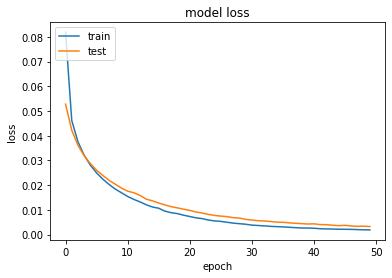

In [342]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
def show_image(x):
    plt.imshow(np.clip(x + 0.5, 0, 1))

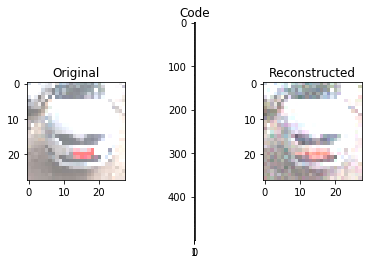

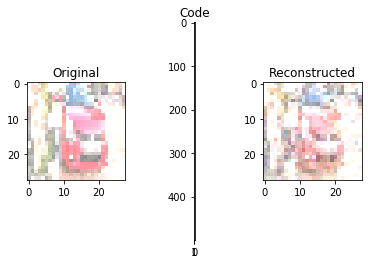

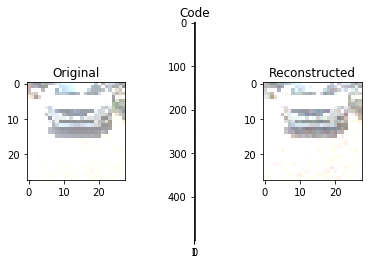

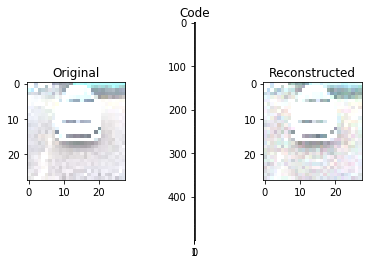

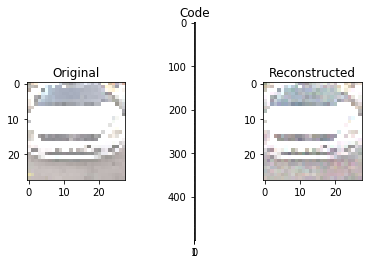

In [344]:
def visualize(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    show_image(img)

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    show_image(reco)
    plt.show()

for i in range(5):
    img = X_test[i]
    visualize(img,encoder,decoder)

In [ ]:
#Image Denoising

def apply_gaussian_noise(X_train, sigma=0.1):
    noise = np.random.normal(loc=0.0, scale=sigma, size=X_train.shape)
    return X_train + noise

def apply_gaussian_noise(X_test, sigma=0.1):
    noise = np.random.normal(loc=0.0, scale=sigma, size=X_test.shape)
    return X_test + noise

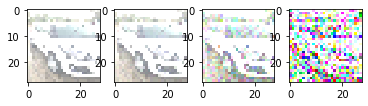

In [347]:
#Show Image with Noise
plt.subplot(1,4,1)
show_image(X_train[0])
plt.subplot(1,4,2)
show_image(apply_gaussian_noise(X_train[:1],sigma=0.01)[0])
plt.subplot(1,4,3)
show_image(apply_gaussian_noise(X_train[:1],sigma=0.1)[0])
plt.subplot(1,4,4)
show_image(apply_gaussian_noise(X_train[:1],sigma=0.5)[0])

In [353]:
code_size = 100

# We can use bigger code size for better quality
encoder, decoder = build_autoencoder(IMG_SHAPE, code_size=code_size)

inp = keras.Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = keras.models.Model(inp, reconstruction)
autoencoder.compile('adamax', 'mse',metrics=['accuracy'])

print(autoencoder.summary())

for i in range(25):
    print("Epoch %i/25, Generating corrupted samples..."%(i+1))
    X_train_noise = apply_gaussian_noise(X_train)
    X_test_noise = apply_gaussian_noise(X_test)

# We continue to train our model with new noise-augmented data
    autoencoder.fit(x=X_train, y=X_train,
                    steps_per_epoch= 120,  #number train_images/batch size(2400/20)
                    epochs=5,
                    validation_data=[X_test, X_test],
                    validation_steps=40, #number valid_images/batch_size(800/20)
                    shuffle=True)

Model: "model_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_149 (InputLayer)       [(None, 28, 28, 3)]       0         
_________________________________________________________________
sequential_98 (Sequential)   (None, 100)               235300    
_________________________________________________________________
sequential_99 (Sequential)   (None, 28, 28, 3)         237552    
Total params: 472,852
Trainable params: 472,852
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/25, Generating corrupted samples...
Train on 2400 samples, validate on 800 samples
Epoch 1/5
2400/2400 [==============================] - 1s 604us/sample - loss: 0.0744 - accuracy: 0.3792 - val_loss: 0.0552 - val_accuracy: 0.3928
Epoch 2/5
2400/2400 [==============================] - 1s 457us/sample - loss: 0.0505 - accuracy: 0.3920 - val_loss: 0.0460 - val_accuracy:

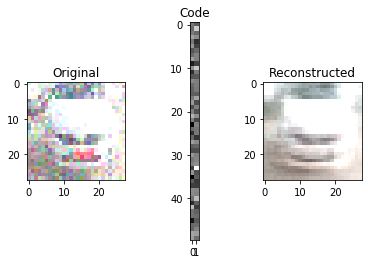

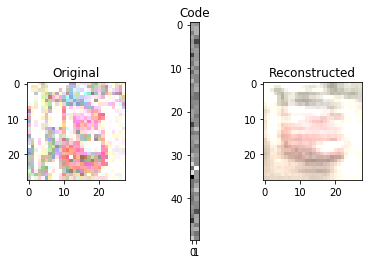

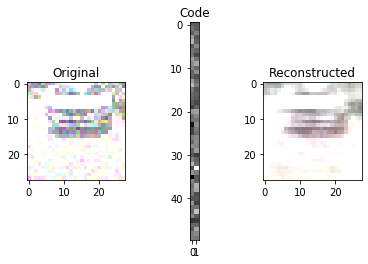

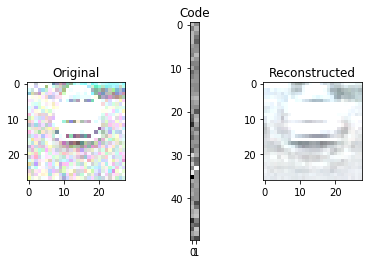

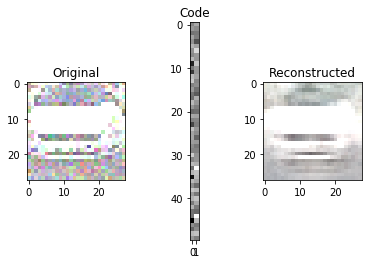

In [354]:
X_test_noise = apply_gaussian_noise(X_test)
for i in range(5):
    img = X_test_noise[i]
    visualize(img,encoder,decoder)